# Homework 4

**ÖNEMLİ:** Beyler aşağıda her bölümde yapılması gereken seyleri belirttim. Herkes tamamladığı kısımların üstünü çift tilda (\~~) ile çizerse geriye ne kalmış anlayabiliriz. Ayrıca **OutputTable** adında bir class olusturdum, output table olusturmak icin uzun uzun yazmanıza gerek yok kullanımına BFGS kodundan bakabilirsiniz.

**ÇOK ÖNEMLİ:** Beyler np.array kullanarak listten array olusturdugunuzda shape i yanlıs geliyor ve matrix gibi algılamayıp islemlerde mal oluyor. Bu yüzden array olusturdugunuzda (özellikle x0 ve grad_f icin) np.reshape kullanarak düzgün shape'i vermeyi unutmayın.

Yazıyı okuyanlar isminin üstünü cizebilirse herkes okuyunca bu yazıyı silebiliriz:
*   ~~Sefa~~
*   ~~Yunus~~
*   Harun
*   ~~Akın~~

### TODOs

Steepest Descent:
*   Algorithm code
*   Function 1 - Solution set 1
*   Function 1 - Solution set 2
*   Function 2 - Solution set 1
*   Function 2 - Solution set 2

Newton's Method:
*   ~~Algorithm code~~
*   ~~Function 1 - Solution set 1~~
*   Function 1 - Solution set 2
*   Function 2 - Solution set 1
*   Function 2 - Solution set 2

DFP:
*   Algorithm code
*   Function 1 - Solution set 1
*   Function 1 - Solution set 2
*   Function 2 - Solution set 1
*   Function 2 - Solution set 2  

BFGS:
*   ~~Algorithm code~~
*   ~~Function 1 - Solution set 1~~
*   Function 1 - Solution set 2
*   Function 2 - Solution set 1
*   Function 2 - Solution set 2

In [2]:
import pandas as pd
import numpy as np
from sympy import Symbol, lambdify

In [114]:
x1 = Symbol("x1")
x2 = Symbol("x2")

func1 = (5*x1 - x2)**4 + (x1 - 2)**2 + x1 - 2*x2 + 12
func2 = 100*(x2 - x1**2)**2 + (1 - x1)**2 


f1 = lambdify([[x1,x2]], func1, "numpy")
f2 = lambdify([[x1,x2]], func2, "numpy")

gf1 = lambdify([[x1,x2]], func1.diff([[x1, x2]]), "numpy")
gf2 = lambdify([[x1,x2]], func2.diff([[x1, x2]]), "numpy")

grad_f1 = lambda x_arr : np.array(gf1(x_arr)).reshape(1,2)
grad_f2 = lambda x_arr : np.array(gf2(x_arr)).reshape(1,2)

f1_hessian = lambdify([[x1,x2]], (func1.diff([[x1, x2]])).diff([[x1, x2]]), "numpy")
f2_hessian = lambdify([[x1,x2]], (func2.diff([[x1, x2]])).diff([[x1, x2]]), "numpy")

grad_f1_hessian= lambda x_arr : np.array(f1_hessian(x_arr)).reshape(2,2)
grad_f2_hessian= lambda x_arr : np.array(f2_hessian(x_arr)).reshape(2,2)

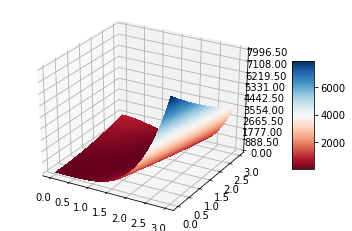

In [266]:
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# plot the function
x = np.arange(0,3,0.01)
y = np.arange(0,3,0.01)
X,Y = meshgrid(x, y) # grid of point
Z = f2([X,Y]) # evaluation of the function on the grid

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.savefig("graph.png")
plt.show()

###### YUNUS-- Notes

In [209]:
x_0=[1,0]
xk = np.array(x_0).reshape(2,1)
func2.diff([[x1, x2]])
a=np.asarray(f2_hessian(x_0))
d_k=-np.linalg.inv(a)@np.transpose(np.asarray(gf2(x_0)).reshape(1,2))

xkp2=[x + y for x, y in zip(x_0,(alpha_k*d_k).flatten().tolist() )]
gf2(x_0),func2.diff([[x1, x2]]),np.linalg.norm(gf2(x_0))

([400, -200],
 [-400*x1*(-x1**2 + x2) + 2*x1 - 2, -200*x1**2 + 200*x2],
 447.21359549995793)

In [ ]:
[[ 803.44042969 -400.        ]
 [-400.          200.        ]]
[0.9999999999999929, 0.003588106483206452]

In [285]:
x_0=[1.0, 0.9963989257812502]
a=np.asarray(f2_hessian(x_0))
d_k=-np.linalg.inv(a)@np.transpose(np.asarray(gf2(x_0)).reshape(1,2))
xkp2=[x + y for x, y in zip(x_0,(alpha_k*d_k).flatten().tolist() )]
a

array([[ 803.44042969, -400.        ],
       [-400.        ,  200.        ]])

In [223]:
x_0=[1,1]
xk = np.array(x_0).reshape(2,1)
d_k=-np.linalg.inv(grad_f1_hessian(xk))@np.transpose(grad_f1(xk))
np.asarray(gf2(x_0)).reshape(1,2),grad_f1(xk)


(array([[0, 0]]), array([[1279, -258]]))

In [241]:
x_0=[1,1]
xk = x_0
xk

[1, 1]

In [167]:
x_0=[3,6]
epsilon=0.001
xk = x_0
k=0
output = OutputTable()
while(True):
    a=np.asarray(f2_hessian(xk))
    print(xk)
    d_k=-np.linalg.inv(a)@np.transpose(np.asarray(gf2(xk)).reshape(1,2))
    alpha_k=ExactLineSearch(f2,np.array(xk).reshape(2,1),d_k)
    xkp=xk+alpha_k*d_k
    if(np.linalg.norm(gf2(xk)) < epsilon):
        break
    #output.add_row(k, np.array(xk), f(np.array(xk)), d_k, alpha_k, np.array(xkp))
    xk= xkp
    k += 1

[3, 6]
[[2.9966842  5.9966842 ]
 [5.96930196 8.96930196]]


TypeError: No loop matching the specified signature and casting
was found for ufunc inv

### Useful Functions

In [13]:
def np_str(x_k):
    '''
    Used to convert numpy array to string with determined format
    '''
    return np.array2string(x_k.reshape(len(x_k)), precision=3, separator=',')

In [7]:
class OutputTable:
    def __init__(self):
        self.table = pd.DataFrame([],columns=['k', 'x^k', 'f(x^k)', 'd^k', 'a^k', 'x^k+1'])
    def add_row(self, k, xk, fxk, dk, ak, xkp):
        self.table.loc[len(self.table)] = [k, np_str(xk), np.asscalar(fxk), np_str(dk), ak, np_str(xkp)]
    def print_latex():
        print(self.table.to_latex(index=False))

### Exact Line Search

In [9]:
def BisectionMethod(f, a=-100,b=100,epsilon=0.005) :
    iteration=0
    while (b - a) >= epsilon:
        x_1 = (a + b) / 2
        fx_1 = f(x_1)
        if f(x_1 + epsilon) <= fx_1:
            a = x_1
        else:
            b = x_1
        iteration+=1
    x_star = (a+b)/2
    return x_star

def ExactLineSearch(f, x0, d):
    alpha = Symbol('alpha')
    function_alpha = f(np.array(x0)+alpha*np.array(d))
    f_alp = lambdify(alpha, function_alpha, 'numpy')
    alp_star = BisectionMethod(f_alp)
    return alp_star

## Steepest Descent Method

## Newton's Method

In [22]:
def NewtonsMethod(x_0,epsilon,f,grad_f,Hessian_f):
    xk = np.array(x_0).reshape(2,1)
    k=0
    output = OutputTable()
    while(True):
        d_k=-np.linalg.inv(Hessian_f(xk))@np.transpose(grad_f(xk))
        alpha_k=ExactLineSearch(f,xk,d_k)
        xkp=xk+alpha_k*d_k
        if(np.linalg.norm(grad_f(xk)) < epsilon):
            break
        output.add_row(k, xk, f(xk), d_k, alpha_k, xkp)
        xk = xkp
        k += 1
    output.add_row(k,xk,f(xk),d_k,None,np.array([]))    
    return xk, np.asscalar(f(xk)), output

In [271]:
def NewtonsMethod_vol2(x_0,epsilon,f,grad_f,Hessian_f):
    xk = x_0
    k=0
    t=0
    output = OutputTable()
    while(True):
        print(xk)
        a=np.asarray(Hessian_f(xk))
        print(a)
        d_k=-np.linalg.inv(a)@np.transpose(np.asarray(grad_f(xk)).reshape(1,2))
        alpha_k=ExactLineSearch(f,np.array(xk).reshape(2,1),d_k)
        xkp=[x + y for x, y in zip(x_0,(alpha_k*d_k).flatten().tolist() )]
        print(xkp)
        print(np.linalg.norm(np.asarray(grad_f(xk)).reshape(1,2)))
        if(np.linalg.norm(np.asarray(grad_f(x_0)).reshape(1,2)) < epsilon):
            break
        #output.add_row(k, np.array(xk), f(np.array(xk)), d_k, alpha_k, np.array(xkp))
        xk= xkp
        k += 1
        if(t>3):
            break
        t +=1
    #output.add_row(k,np.array(xk),f(np.array(xk)),d_k,None,np.array([]))    
    return (xk)



In [17]:
x_f1_s1,f1_s1, outputf1_1 = NewtonsMethod([10,10], 0.001,f1,grad_f1,grad_f1_hessian)
outputf1_1.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[10,10]",2560066,"[-3.5 ,-4.167]",2.94342,"[-0.302,-2.264]"
1,1,"[-0.302,-2.264]",21.8484,"[ 6.802,34.554]",1.00861,"[ 6.559,32.588]"
2,2,"[ 6.559,32.588]",-25.8349,"[-0.059, 3.744]",0.245667,"[ 6.544,33.507]"
3,3,"[ 6.544,33.507]",-27.4384,"[-0.044,-0.214]",0.996399,"[ 6.5 ,33.295]"
4,4,"[ 6.5 ,33.295]",-27.4406,"[-0. ,-0.001]",0.996399,"[ 6.5 ,33.294]"
5,5,"[ 6.5 ,33.294]",-27.4406,"[-5.726e-07,-3.002e-06]",None,[]


In [19]:
x_f1_s2,f1_s2, outputf1_2 = NewtonsMethod([-25,75], 0.001,f1,grad_f1,grad_f1_hessian)
outputf1_2.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[-25, 75]",1600000566,"[31.5 ,90.833]",2.96173,"[ 68.295,344.024]"
1,1,"[ 68.295,344.024]",3829.58,"[ -61.795,-309.797]",0.999451,"[ 6.534,34.397]"
2,2,"[ 6.534,34.397]",-20.809,"[-0.034,-0.689]",1.79291,"[ 6.473,33.16 ]"
3,3,"[ 6.473,33.16 ]",-27.4398,"[0.027,0.133]",0.996399,"[ 6.5 ,33.293]"
4,4,"[ 6.5 ,33.293]",-27.4406,"[9.692e-05,4.775e-04]",None,[]


In [274]:
NewtonsMethod_vol2([1,0], 0.001,f2,gf2,f2_hessian)

[1, 0]
[[1202 -400]
 [-400  200]]
[1.0, 0.9963989257812502]
447.21359549995793
[1.0, 0.9963989257812502]
[[ 803.44042969 -400.        ]
 [-400.          200.        ]]
[0.9999999999999929, 0.003588106483206452]
1.6104493490292848
[0.9999999999999929, 0.003588106483206452]
[[1200.56475741 -400.        ]
 [-400.          200.        ]]
[1.0, 0.9928237403357802]
445.60894549855755
[1.0, 0.9928237403357802]
[[ 804.87050387 -400.        ]
 [-400.          200.        ]]
[1.0000000000000013, 0.007150417420558973]
3.209320886677038
[1.0000000000000013, 0.007150417420558973]
[[1199.13983303 -400.        ]
 [-400.          200.        ]]
[0.9999999999999999, 0.9892742575445199]
444.01583161598586


[0.9999999999999999, 0.9892742575445199]

## DFP

In [28]:
def DFP(f, grad_f, x_0, epsilon):
    xk = np.array(x_0).reshape(2,1)
    k = 0
    H = np.identity(len(x_0))
    stop = False
    output = OutputTable()
    while(stop == False):
        d = -H @ np.transpose(grad_f(xk))
        if(np.linalg.norm(d) < epsilon):
            stop = True
        else:
            a = ExactLineSearch(f,xk,d)
            xkp = xk + a*d
            p = xkp - xk
            q = np.transpose(grad_f(xkp)) - np.transpose(grad_f(xk))
            A = (p @ np.transpose(p)) / (p.transpose() @ q)
            B = - (H @ q @ np.transpose( H @ q)) / (q.transpose() @ H @ q)
            Hkp = H + A + B
            output.add_row(k, xk, f(xk), d, a, xkp)
            k += 1
            xk = xkp
            H = Hkp
    output.add_row(k,xk,f(xk),d,None,np.array([]))
    return xk, np.asscalar(f(xk)), output

In [29]:
xs1, fs1, output1 = DFP(f1, grad_f1, [0,0], 0.001)
xs1, fs1

(array([[ 6.50004193],
        [33.29392539]]), -27.44055078634222)

In [30]:
output1.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[0,0]",16,"[3.,2.]",0.0442505,"[0.133,0.089]"
1,1,"[0.133,0.089]",15.5519,"[0.491,2.493]",13.1149,"[ 6.575,32.79 ]"
2,2,"[ 6.575,32.79 ]",-26.0735,"[-0.057, 0.706]",0.883484,"[ 6.524,33.414]"
3,3,"[ 6.524,33.414]",-27.44,"[-0.024,-0.117]",0.898743,"[ 6.502,33.309]"
4,4,"[ 6.502,33.309]",-27.4405,"[-0.006,-0.038]",0.395203,"[ 6.5 ,33.294]"
5,5,"[ 6.5 ,33.294]",-27.4406,"[-4.193e-05,-2.248e-04]",None,[]


Akin kardesime selam olsun. 4. Katta bulusmak uzere...
                                Sevgiler
                                 Harun

## BFGS

In [21]:
def BFGS(f, grad_f, x_0, epsilon):
    xk = np.array(x_0).reshape(2,1)
    k = 0
    H = np.identity(len(x_0))
    stop = False
    output = OutputTable()
    while(stop == False):
        d = -H @ np.transpose(grad_f(xk))
        if(np.linalg.norm(d) < epsilon):
            stop = True
        if(k == -1):
            break
        else:
            a = ExactLineSearch(f,xk,d)
            xkp = xk + a*d
            p = xkp - xk
            q = np.transpose(grad_f(xkp)) - np.transpose(grad_f(xk))
            A = ((1+ np.transpose(q) @ H @ q) / (np.transpose(q) @ p)) * (p @ np.transpose(p)) / (np.transpose(p) @ q)
            B = - (p @ np.transpose(q) @ H + H @ q @ np.transpose(p)) / (np.transpose(q) @ p)
            Hkp = H + A + B
            output.add_row(k, xk, f(xk), d, a, xkp)
            k += 1
            xk = xkp
            H = Hkp
    output.add_row(k,xk,f(xk),d,None,np.array([]))
    return xk, np.asscalar(f(xk)), output


In [22]:
xs1, fs1, output1 = BFGS(f1, grad_f1, [0,0], 0.001)
xs1, fs1

(array([[ 6.4995995 ],
        [33.29213559]]), -27.44054990454422)

In [23]:
output1.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[0,0]",16,"[3.,2.]",0.0442505,"[0.133,0.089]"
1,1,"[0.133,0.089]",15.5519,"[0.963,4.868]",6.66656,"[ 6.553,32.54 ]"
2,2,"[ 6.553,32.54 ]",-25.7982,"[-0.173, 2.234]",0.325012,"[ 6.496,33.266]"
3,3,"[ 6.496,33.266]",-27.4402,"[-0.001, 0.014]",0.520325,"[ 6.496,33.273]"
4,4,"[ 6.496,33.273]",-27.4405,"[-0.005, 0.067]",-0.00152588,"[ 6.496,33.273]"
5,5,"[ 6.496,33.273]",-27.4405,"[ -71.486,1029.42 ]",-0.00152588,"[ 6.605,31.702]"
6,6,"[ 6.605,31.702]",-20.5324,"[-0.005, 0.066]",23.8388,"[ 6.497,33.279]"
7,7,"[ 6.497,33.279]",-27.4405,"[3.545e-05,1.858e-04]",71.0648,"[ 6.5 ,33.292]"
8,8,"[ 6.5 ,33.292]",-27.4405,"[3.545e-05,1.858e-04]",None,[]


In [24]:
xs2, fs2, output2 = BFGS(f1, grad_f1, [10,10], 0.001)
xs2, fs2

(array([[ -615682.95451531],
        [-3077907.80209916]]), 445132303112.5189)

In [25]:
output2.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[10,10]",2560066,"[-1280017., 256002.]",-0.00152588,"[1963.151,-380.628]"
1,1,"[1963.151,-380.628]",1.0809e+16,"[-0.27 ,-1.346]",99.9985,"[1936.113,-515.196]"
2,2,"[1936.113,-515.196]",1.08063e+16,"[11204.828,56024.005]",-99.9985,"[-1118529.603,-5602830.199]"
3,3,"[-1118529.603,-5602830.199]",1.07502e+16,"[152481.149,762452.782]",99.9985,"[14129352.638,70641284.582]"
4,4,"[14129352.638,70641284.582]",1.10055e+15,"[ -4975.245,-24876.173]",99.9985,"[13631835.74 ,68153705.264]"
5,5,"[13631835.74 ,68153705.264]",1.08334e+15,"[15.742,78.718]",99.9985,"[13633409.883,68161576.963]"
6,6,"[13633409.883,68161576.963]",1.08274e+15,"[-0.203,-1.016]",99.9985,"[13633389.563,68161475.364]"
7,7,"[13633389.563,68161475.364]",1.08273e+15,"[ -20618.895,-103093.78 ]",99.9985,"[11571531.546,57852254.692]"
8,8,"[11571531.546,57852254.692]",9.86121e+14,"[0.029,0.147]",99.9985,"[11571534.465,57852269.344]"
9,9,"[11571534.465,57852269.344]",9.86086e+14,"[0.077,0.389]",99.9985,"[11571542.211,57852308.238]"


In [238]:
xs3, fs3, output3 = BFGS(f2, grad_f2, [0,0], 0.001)
xs3, fs3

(array([[ 10.3087146 ],
        [106.28439447]]), 86.67406483533888)

In [239]:
output3.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[0,0]",1,"[2.,0.]",0.0778198,"[0.156,0. ]"
1,1,"[0.156,0. ]",0.771623,"[14.237, 5.326]",0.00762939,"[0.264,0.041]"
2,2,"[0.264,0.041]",0.626576,"[0.466,0.438]",0.779724,"[0.627,0.382]"
3,3,"[0.627,0.382]",0.151823,"[-0.36 , 0.052]",3.83759,"[-0.754, 0.582]"
4,4,"[-0.754, 0.582]",3.09615,"[-0.967,-0.186]",0.00152588,"[-0.755, 0.582]"
5,5,"[-0.755, 0.582]",3.09466,"[-0.777,-0.211]",-2.3056,"[1.036,1.069]"
6,6,"[1.036,1.069]",0.00262663,"[-4.95 ,-1.609]",-0.00152588,"[1.043,1.071]"
7,7,"[1.043,1.071]",0.0305442,"[-0.275,-0.09 ]",6.32477,"[-0.699, 0.499]"
8,8,"[-0.699, 0.499]",2.89796,"[-0.065,-0.087]",0.0198364,"[-0.701, 0.497]"
9,9,"[-0.701, 0.497]",2.89633,"[-0.068,-0.127]",0.00457764,"[-0.701, 0.497]"


In [240]:
xs4, fs4, output4 = BFGS(f2, grad_f2, [5,5], 0.001)
xs4, fs4

(array([[66.26186956],
        [27.35226086]]), 1903828197.1174762)

In [241]:
output4.table

,k,x^k,f(x^k),d^k,a^k,x^k+1
0,0,"[5,5]",40016,"[-40008., 4000.]",-0.00152588,"[66.047,-1.104]"
1,1,"[66.047,-1.104]",1.90389e+09,"[ 28.116,3729.756]",0.00762939,"[66.262,27.352]"
2,2,"[66.262,27.352]",1.90383e+09,"[8.292e-07,1.108e-04]",None,[]


In [41]:
from scipy.optimize import minimize

In [42]:
minimize(fun=f1, x0=[0,0], method='BFGS', tol=0.005)


      fun: -27.440550788387824
 hess_inv: array([[ 0.47354836,  2.36296605],
       [ 2.36296605, 11.92423175]])
      jac: array([-3.86714935e-04,  7.15255737e-05])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 11
     njev: 16
   status: 0
  success: True
        x: array([ 6.49998414, 33.29363065])